# Machine Learning Clustering Tipe Pengguna Digital Dataset Mental Health Digital Behavior by Wiga

## Penjelasan

### Dataset Overview
Kumpulan data ini berisi data simulasi tentang bagaimana perilaku digital berkorelasi dengan indikator kesehatan mental, khususnya berfokus pada faktor-faktor seperti waktu penggunaan layar, penggunaan aplikasi, tidur, dan konsumsi media sosial. Kumpulan data ini ideal untuk tugas pembelajaran mesin seperti regresi, klasifikasi, dan pengelompokan untuk menganalisis hubungan antara pola perilaku digital dan kesejahteraan mental.

Data tersebut mencakup aspek-aspek perilaku digital dan kesehatan mental berikut.

Digital Behavior:

1. Daily screen time (minutes)
2. Number of app switches
3. Social media usage time (minutes)
4. Notification count
5. Focus and concentration scores

Mental Health Indicators:
1. Mood score (self-reported)
2. Anxiety levels (self-reported)
3. Sleep duration (hours)

### Penjelasan Variabel Dataset :

| Feature Name              | Description                                                                                      | Data Type |
|---------------------------|--------------------------------------------------------------------------------------------------|-----------|
| daily_screen_time_min     | Total daily screen time (mobile + desktop, in minutes)                                           | Numeric   |
| num_app_switches          | Number of times the user switched between apps in a day                                          | Integer   |
| sleep_hours               | Number of hours slept per day                                                                    | Numeric   |
| notification_count        | Number of notifications received by the user in a day                                            | Integer   |
| social_media_time_min     | Time spent on social media platforms (e.g., Instagram, Facebook, YouTube) in minutes             | Numeric   |
| focus_score               | Self-reported focus score (1–10, where 1 is very distracted and 10 is highly focused)            | Numeric   |
| mood_score                | Self-reported mood score (1–10, where 1 is very poor mood and 10 is excellent mood)              | Numeric   |
| anxiety_level             | Self-reported anxiety level (1–10, where 1 is low anxiety and 10 is high anxiety)                | Numeric   |
| digital_wellbeing_score   | Calculated score based on focus, sleep, and anxiety levels; higher value represents better well-being | Numeric   |

Dataset ini sudah bersih dan bebas dari :

1. Null values
2. Duplicate records
3. Outliers (except for intentionally simulated ones)

### Sumber dataset :

 https://www.kaggle.com/datasets/atharvasoundankar/mental-health-and-digital-behavior-20202024?select=mental_health_digital_behavior_data.csv

### Tujuan

Clustering (Unsuvervised) Tipe Pengguna Digital, dengan Tujuan untuk Mengelompokkan pengguna berdasarkan pola penggunaan digital (screen time, app switches, dll.) menggunakan Algoritma Clustering K-Means, yang menghasilkan Output berupa Segmentasi pengguna seperti "pengguna berat", "pengguna sosial", "pengguna sehat digital", dll.

dengan fitur :
1. 'daily_screen_time_min',
2. 'num_app_switches',
3. 'notification_count',
4. 'social_media_time_min',
5. 'sleep_hours'


## Clustering Tipe Pengguna Digital

### CLustering Dengan K-Means

#### Import Dataset

In [1]:
import pandas as pd
from google.colab import files

# Upload file CSV
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

# Lihat nama kolom dan beberapa baris awal
print("Nama kolom:")
print(df.columns)

df.head()

Saving mental_health_digital_behavior_data.csv to mental_health_digital_behavior_data.csv
Nama kolom:
Index(['daily_screen_time_min', 'num_app_switches', 'sleep_hours',
       'notification_count', 'social_media_time_min', 'focus_score',
       'mood_score', 'anxiety_level', 'digital_wellbeing_score'],
      dtype='object')


,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
0,389.8,53,5.9,89,133.2,6.8,8.9,10.0,44.8
1,351.7,52,7.2,79,109.5,5.5,9.4,10.0,43.6
2,398.9,39,8.0,108,84.7,6.7,9.4,9.4,52.6
3,451.4,44,6.5,78,88.9,6.0,9.4,5.1,58.4
4,346.0,43,6.9,35,78.8,8.2,9.4,8.0,59.7


#### Preprocessing & Normalisasi

In [2]:
from sklearn.preprocessing import StandardScaler

# Pilih fitur yang sudah disepakati
features = [
    'daily_screen_time_min',
    'num_app_switches',
    'notification_count',
    'social_media_time_min',
    'sleep_hours'
]

# Ambil subset data
X = df[features].copy()

# Cek dan isi missing values (jika ada)
X.fillna(X.mean(), inplace=True)

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ubah kembali ke DataFrame agar mudah dibaca
import numpy as np
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

X_scaled_df.head()


,daily_screen_time_min,num_app_switches,notification_count,social_media_time_min,sleep_hours
0,0.500006,0.430891,0.396064,0.261123,-0.552042
1,-0.148795,0.294533,-0.021373,-0.280398,0.539614
2,0.654969,-1.478118,1.189193,-0.847053,1.211403
3,1.548987,-0.796329,-0.063116,-0.751087,-0.048201
4,-0.245860,-0.932687,-1.858093,-0.981862,0.287694


#### Visualisasi PCA

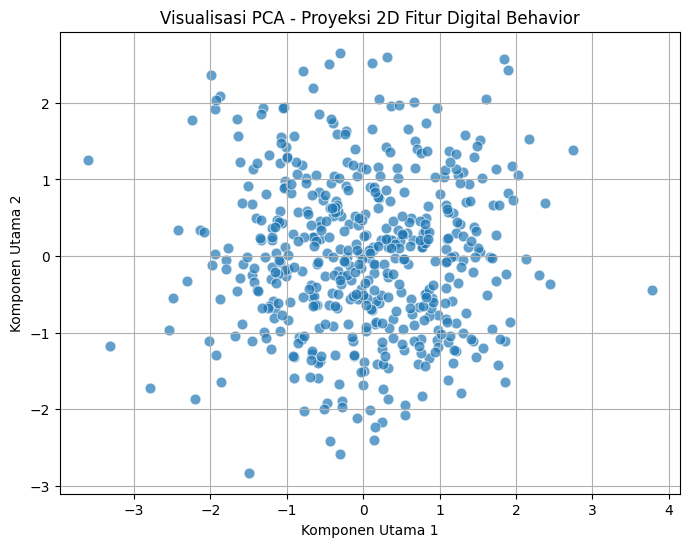

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Proyeksi 2D dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Buat DataFrame hasil proyeksi
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=60, alpha=0.7)
plt.title('Visualisasi PCA - Proyeksi 2D Fitur Digital Behavior')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.grid(True)
plt.show()

#### Clustering K-Means

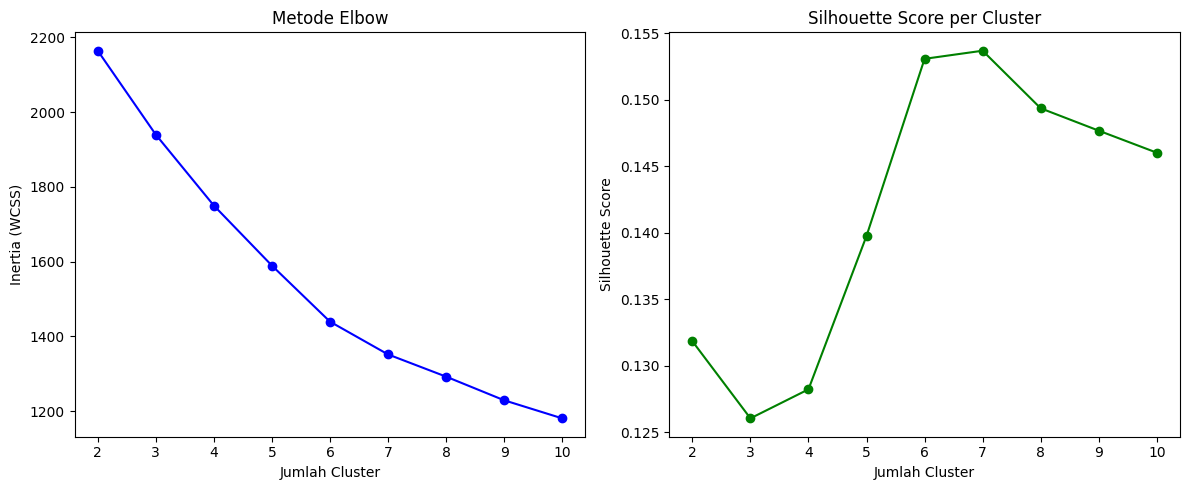

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow dan Silhouette
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia (WCSS)')
plt.title('Metode Elbow')

plt.subplot(1,2,2)
plt.plot(K, silhouette, 'go-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score per Cluster')

plt.tight_layout()
plt.show()

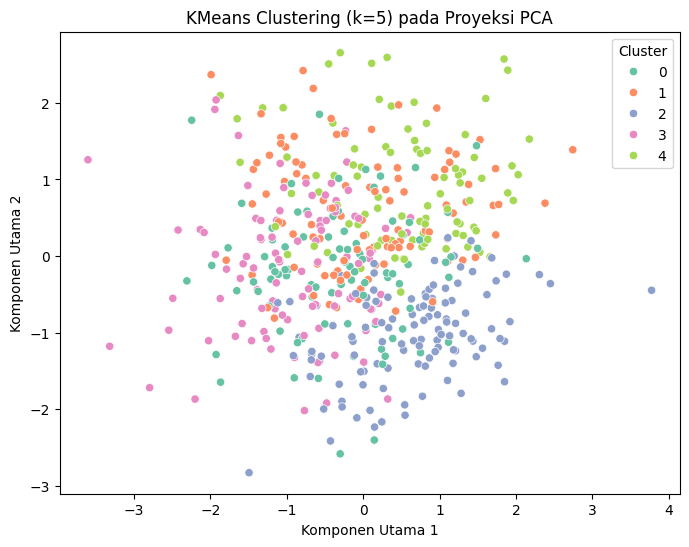

In [5]:
# KMeans Final
kmeans_final = KMeans(n_clusters=5, random_state=42)
clusters_kmeans = kmeans_final.fit_predict(X_scaled)

# Tambahkan label cluster ke data asli
df_clustered = df.copy()
df_clustered['cluster'] = clusters_kmeans

# Visualisasi hasil cluster pada PCA 2D
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_kmeans, palette='Set2')
plt.title("KMeans Clustering (k=5) pada Proyeksi PCA")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.legend(title="Cluster")
plt.show()


#### Interpretasi Karakteristik Setiap Cluster

In [6]:
# Rata-rata tiap fitur per cluster
mean_features = df_clustered.groupby('cluster').mean().round(2)
mean_features.T  # Transpose agar mudah dibaca

cluster,0,1,2,3,4
daily_screen_time_min,367.70,425.01,312.88,370.06,332.43
num_app_switches,52.07,48.52,43.66,48.77,57.85
sleep_hours,7.79,5.85,6.25,7.39,5.67
notification_count,96.27,84.12,86.41,58.84,72.17
social_media_time_min,150.06,121.15,126.39,87.81,125.98
focus_score,6.75,6.73,7.26,7.18,7.01
mood_score,8.84,9.02,9.00,9.19,8.86
anxiety_level,9.26,8.70,8.64,7.64,8.05
digital_wellbeing_score,52.58,48.42,51.89,57.94,50.89


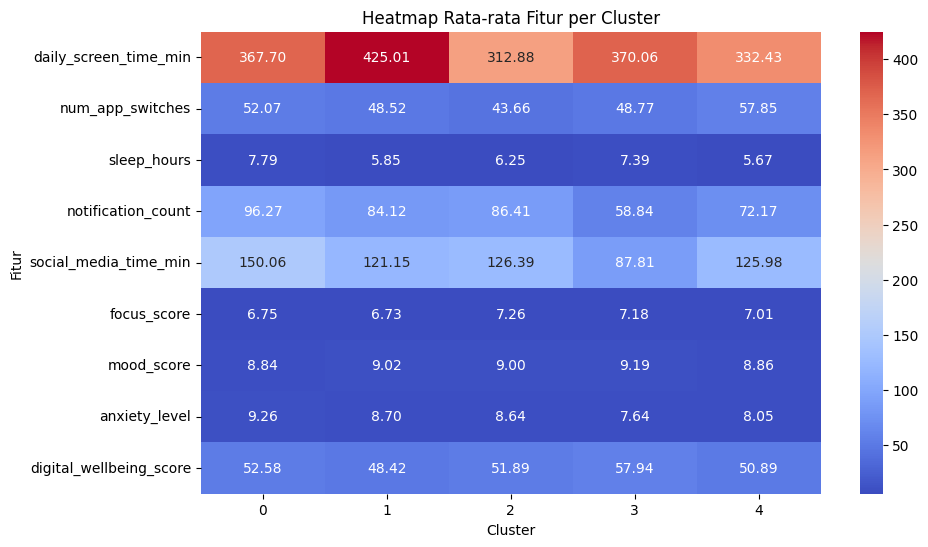

In [7]:
# Heatmap Karakteristik Cluster:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(mean_features.T, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Heatmap Rata-rata Fitur per Cluster")
plt.ylabel("Fitur")
plt.xlabel("Cluster")
plt.show()

#### Radar Chart per Cluster

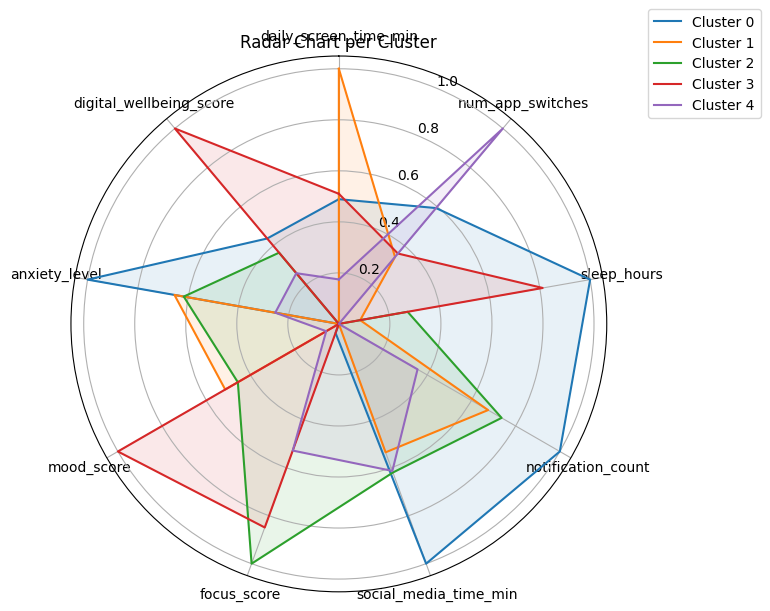

In [8]:
# Re-import necessary libraries after code execution state reset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data cluster yang diberikan
data = {
    'cluster': [0, 1, 2, 3, 4],
    'daily_screen_time_min': [367.70, 425.01, 312.88, 370.06, 332.43],
    'num_app_switches': [52.07, 48.52, 43.66, 48.77, 57.85],
    'sleep_hours': [7.79, 5.85, 6.25, 7.39, 5.67],
    'notification_count': [96.27, 84.12, 86.41, 58.84, 72.17],
    'social_media_time_min': [150.06, 121.15, 126.39, 87.81, 125.98],
    'focus_score': [6.75, 6.73, 7.26, 7.18, 7.01],
    'mood_score': [8.84, 9.02, 9.00, 9.19, 8.86],
    'anxiety_level': [9.26, 8.70, 8.64, 7.64, 8.05],
    'digital_wellbeing_score': [52.58, 48.42, 51.89, 57.94, 50.89]
}

# Buat DataFrame
df = pd.DataFrame(data)
df.set_index('cluster', inplace=True)

# Normalisasi data per fitur (agar setara dalam radar chart)
df_norm = (df - df.min()) / (df.max() - df.min())

# Radar chart setup
labels = df.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # ulangi titik pertama untuk menutup chart

# Plot radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for idx, row in df_norm.iterrows():
    values = row.tolist()
    values += values[:1]  # ulangi nilai pertama untuk menutup chart
    ax.plot(angles, values, label=f'Cluster {idx}')
    ax.fill(angles, values, alpha=0.1)

# Tampilan
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title("Radar Chart per Cluster")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


#### Interpretasi Setiap Cluster

| Cluster       | Deskripsi Umum                               | Ciri Khas                                                                                                                                                                                                                                                   |
| ------------- | -------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Cluster 0** | 🟠 **"Sosial Aktif, Seimbang"**              | Screen time tinggi (368m), banyak notifikasi (96x), waktu di media sosial paling tinggi (150m), fokus dan mood cukup tinggi, tidur ideal (7.8 jam), namun kecemasan tertinggi (9.26) — kemungkinan pengguna yang **sangat aktif sosial, tapi mudah stres**. |
| **Cluster 1** | 🔴 **"Heavy User dengan Kurang Tidur"**      | Screen time tertinggi (425m), tidur paling rendah (5.85 jam), app switching tinggi, digital wellbeing terendah (48.42). Ini bisa jadi pengguna yang **overconnected dan kelelahan digital**.                                                                |
| **Cluster 2** | 🟢 **"Produktif & Terkontrol"**              | Screen time paling rendah (312m), fokus tertinggi (7.26), mood baik, kecemasan relatif rendah (8.64), dan skor wellbeing cukup tinggi (51.89). Cocok disebut sebagai **pengguna disiplin dan produktif**.                                                   |
| **Cluster 3** | 🔵 **"Seimbang & Well-being Tinggi"**        | Notifikasi dan screen time paling rendah, tidur nyaris ideal (7.4 jam), mood dan fokus tinggi, kecemasan paling rendah (7.64), serta skor digital wellbeing tertinggi (57.94). Ini adalah **pengguna paling sehat secara digital**.                         |
| **Cluster 4** | 🟣 **"Multitasker dengan Kecemasan Tinggi"** | App switches paling tinggi (57.8), notifikasi moderat, screen time sedang, fokus dan mood stabil, tapi tidur rendah (5.67 jam), serta kecemasan cukup tinggi (8.05). Mungkin tipe **multitasker dengan stres ringan hingga sedang**.  

#### Rangkuman
Dari hasil clustering:

1. Cluster 3 adalah kelompok pengguna dengan digital well-being terbaik, rendah kecemasan, tidur cukup, dan tidak terlalu tergantung pada perangkat.

2. Sebaliknya, Cluster 1 menunjukkan pola penggunaan paling berat, dengan waktu layar tertinggi, tidur minim, dan wellbeing rendah.

3. Cluster 0 dan 4 tampaknya mengalami tekanan atau stres digital, meskipun tetap aktif secara sosial.

4. Cluster 2 adalah pengguna dengan kontrol dan fokus terbaik, yang menunjukkan gaya hidup digital produktif dan stabil.                      |
